<a href="https://colab.research.google.com/github/manish-4007/Mobile-PriceRange-Classification/blob/main/Mobile_Price_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !pip install seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/content/drive/MyDrive/project/Mobile Prices/train.csv')


In [5]:
test_df = pd.read_csv('/content/drive/MyDrive/project/Mobile Prices/test.csv')
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

<Axes: xlabel='price_range', ylabel='count'>

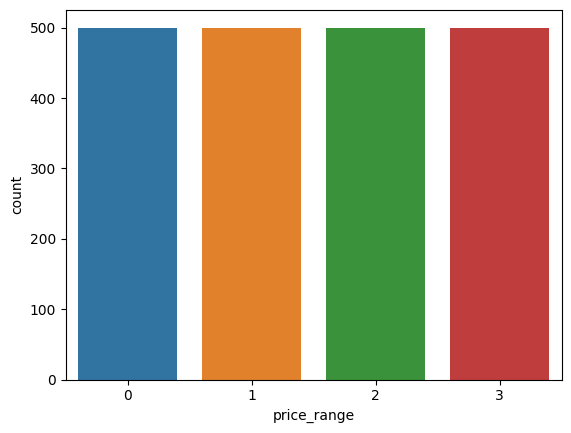

In [7]:
sns.countplot(x=df['price_range'])

In [8]:
# sns.pairplot(df, hue='price_range', palette='coolwarm')

<Axes: >

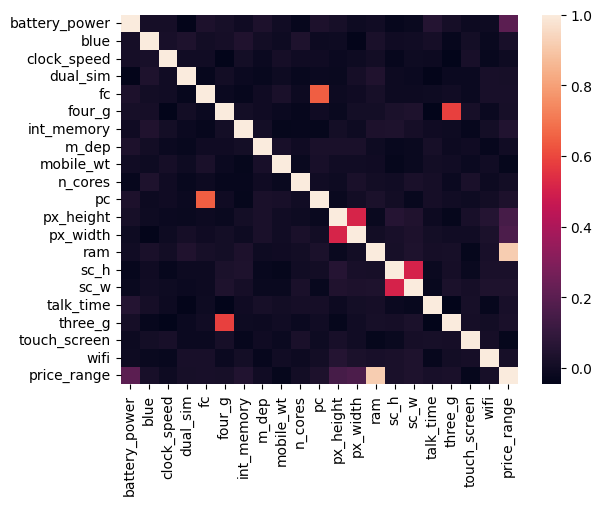

In [9]:
sns.heatmap(df.corr())

In [10]:
X = df.iloc[:,:-1].values
y = pd.get_dummies(df.iloc[:,-1]).values

In [11]:
from sklearn.preprocessing import StandardScaler
SC = StandardScaler()
X = SC.fit_transform(X)


In [12]:
X

array([[-0.90259726, -0.9900495 ,  0.83077942, ..., -1.78686097,
        -1.00601811,  0.98609664],
       [-0.49513857,  1.0100505 , -1.2530642 , ...,  0.55964063,
         0.99401789, -1.01409939],
       [-1.5376865 ,  1.0100505 , -1.2530642 , ...,  0.55964063,
         0.99401789, -1.01409939],
       ...,
       [ 1.53077336, -0.9900495 , -0.76274805, ...,  0.55964063,
         0.99401789, -1.01409939],
       [ 0.62252745, -0.9900495 , -0.76274805, ...,  0.55964063,
         0.99401789,  0.98609664],
       [-1.65833069,  1.0100505 ,  0.58562134, ...,  0.55964063,
         0.99401789,  0.98609664]])

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=42)

In [14]:
from tensorflow import keras
from keras import Sequential,layers
from keras.layers import Dense 

In [ ]:
!pip install keras-tuner --upgrade

In [16]:
import kerastuner
from kerastuner.tuners import RandomSearch

<ipython-input-16-1aa075400f3b>:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner


In [17]:
model = Sequential()
model.add(Dense(32, activation = 'relu', input_dim = 20))
model.add(Dense(40, activation = 'elu'))
model.add(Dense(20, activation = 'elu'))
model.add(Dense(35, activation = 'relu'))
model.add(Dense(4, activation = 'softmax'))

model.compile(optimizer='Adam', loss="categorical_crossentropy", metrics = ['accuracy'])
model.fit(X_train, y_train, batch_size=40, epochs = 100)

Epoch 1/100
38/38 [==============================] - 8s 6ms/step - loss: 1.3756 - accuracy: 0.2907
Epoch 2/100
38/38 [==============================] - 0s 5ms/step - loss: 1.2278 - accuracy: 0.4347
Epoch 3/100
38/38 [==============================] - 0s 6ms/step - loss: 0.9182 - accuracy: 0.6080
Epoch 4/100
38/38 [==============================] - 0s 8ms/step - loss: 0.6002 - accuracy: 0.7640
Epoch 5/100
38/38 [==============================] - 0s 7ms/step - loss: 0.4109 - accuracy: 0.8527
Epoch 6/100
38/38 [==============================] - 0s 6ms/step - loss: 0.3009 - accuracy: 0.8867
Epoch 7/100
38/38 [==============================] - 0s 7ms/step - loss: 0.2468 - accuracy: 0.9027
Epoch 8/100
38/38 [==============================] - 0s 7ms/step - loss: 0.2028 - accuracy: 0.9233
Epoch 9/100
38/38 [==============================] - 0s 6ms/step - loss: 0.1710 - accuracy: 0.9393
Epoch 10/100
38/38 [==============================] - 0s 7ms/step - loss: 0.1482 - accuracy: 0.9413
Epoch 11/

#Since our model is over-fitting the data so we have to do hyper-parameter tuning to achieve appropriate paramerers
1. What will the best optimizers
2. How many neurons show we use
3. How many Layers should we use
4. Learning rate 


In [19]:
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Flatten())
    model.add(
        layers.Dense(
            # Define the hyperparameter.
            units=hp.Int("units", min_value=32, max_value=512, step=32),
            activation="relu",
        )
    )
    model.add(layers.Dense(4, activation="softmax"))
    optimizers = hp.Choice('optimizers', values=['adam', 'rmsprop', 'sgd', 'adagrad', 'adadelta', 'nadadm'])
    model.compile(
        optimizer=optimizers, loss="categorical_crossentropy", metrics=["accuracy"],
    )
    return model

In [20]:
tuner = RandomSearch(build_model, objective="val_accuracy",
    max_trials=10,
    overwrite=True,
    directory="my_dir",
    project_name="check")

In [21]:
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Trial 10 Complete [00h 00m 03s]
val_accuracy: 0.6100000143051147

Best val_accuracy So Far: 0.8960000276565552
Total elapsed time: 00h 00m 23s


In [22]:
tuner.get_best_hyperparameters()[0].values

{'units': 480, 'optimizers': 'rmsprop'}

In [23]:
model = tuner.get_best_models(num_models = 2)[0]

In [ ]:
tuner.results_summary()

In [25]:
model.fit(X_train, y_train,batch_size = 40, epochs=100, initial_epoch = 5, validation_data=(X_test, y_test))

Epoch 6/100
38/38 [==============================] - 1s 8ms/step - loss: 0.2713 - accuracy: 0.9567 - val_loss: 0.3124 - val_accuracy: 0.9040
Epoch 7/100
38/38 [==============================] - 0s 5ms/step - loss: 0.2301 - accuracy: 0.9687 - val_loss: 0.2797 - val_accuracy: 0.9220
Epoch 8/100
38/38 [==============================] - 0s 5ms/step - loss: 0.1952 - accuracy: 0.9793 - val_loss: 0.2553 - val_accuracy: 0.9220
Epoch 9/100
38/38 [==============================] - 0s 4ms/step - loss: 0.1694 - accuracy: 0.9740 - val_loss: 0.2491 - val_accuracy: 0.9100
Epoch 10/100
38/38 [==============================] - 0s 5ms/step - loss: 0.1481 - accuracy: 0.9800 - val_loss: 0.2276 - val_accuracy: 0.9220
Epoch 11/100
38/38 [==============================] - 0s 4ms/step - loss: 0.1317 - accuracy: 0.9840 - val_loss: 0.2212 - val_accuracy: 0.9180
Epoch 12/100
38/38 [==============================] - 0s 4ms/step - loss: 0.1171 - accuracy: 0.9880 - val_loss: 0.2083 - val_accuracy: 0.9260
Epoch 13/1

Now let's tune the layers and neurons of the network

In [26]:
def build_model(hp):
  model = Sequential()

  model.add(Dense(256,activation='relu',input_dim = 20))

  for i in range(hp.Int('num_layers', min_value=2,max_value=30)):
    model.add(Dense(256,activation='relu'))
  model.add(Dense(4, activation='softmax'))

  model.compile('rmsprop', loss="categorical_crossentropy", metrics=["accuracy"])
  return model



In [27]:
tuner = RandomSearch(build_model, objective="val_accuracy",
    max_trials=5,
    overwrite=True,
    directory="my_dir",
    project_name="num_layers")

In [28]:
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Trial 5 Complete [00h 00m 09s]
val_accuracy: 0.23999999463558197

Best val_accuracy So Far: 0.8880000114440918
Total elapsed time: 00h 00m 49s


In [29]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 12}

In [30]:
model = tuner.get_best_models(num_models = 1)[0]

In [31]:
tuner.results_summary()

Results summary
Results in my_dir/num_layers
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0 summary
Hyperparameters:
num_layers: 12
Score: 0.8880000114440918

Trial 2 summary
Hyperparameters:
num_layers: 10
Score: 0.8820000290870667

Trial 3 summary
Hyperparameters:
num_layers: 22
Score: 0.25999999046325684

Trial 1 summary
Hyperparameters:
num_layers: 27
Score: 0.23999999463558197

Trial 4 summary
Hyperparameters:
num_layers: 21
Score: 0.23999999463558197


In [32]:
model.fit(X_train, y_train,batch_size = 40, epochs=100, initial_epoch = 5, validation_data=(X_test, y_test))

Epoch 6/100
38/38 [==============================] - 4s 13ms/step - loss: 0.3867 - accuracy: 0.8627 - val_loss: 0.5165 - val_accuracy: 0.7860
Epoch 7/100
38/38 [==============================] - 0s 8ms/step - loss: 0.2350 - accuracy: 0.9220 - val_loss: 0.3326 - val_accuracy: 0.8900
Epoch 8/100
38/38 [==============================] - 0s 7ms/step - loss: 0.2653 - accuracy: 0.9187 - val_loss: 0.3281 - val_accuracy: 0.8740
Epoch 9/100
38/38 [==============================] - 0s 7ms/step - loss: 0.1872 - accuracy: 0.9393 - val_loss: 0.3952 - val_accuracy: 0.8600
Epoch 10/100
38/38 [==============================] - 0s 7ms/step - loss: 0.1802 - accuracy: 0.9493 - val_loss: 0.3168 - val_accuracy: 0.8900
Epoch 11/100
38/38 [==============================] - 0s 8ms/step - loss: 0.1429 - accuracy: 0.9607 - val_loss: 0.3776 - val_accuracy: 0.8960
Epoch 12/100
38/38 [==============================] - 0s 10ms/step - loss: 0.1334 - accuracy: 0.9587 - val_loss: 0.6365 - val_accuracy: 0.8540
Epoch 13

In [33]:
def build_model(hp):
  
  model = Sequential()
  model.add(
      Dense(
          hp.Int('units_1', min_value = 12, max_value= 300, step = 10 ),
          hp.Choice('activation1', values=['relu','elu','linear','sigmoid','tanh']),
          input_dim = 20
      )
  )    
  for i in range(hp.Int('num_layers', min_value=2, max_value=30)):
    model.add(
        Dense(
            hp.Int('units_'+str(i), min_value=8, max_value= 512, step = 8),
            activation = hp.Choice('activation'+str(i), values=['relu','elu','linear','sigmoid','tanh'])
        )
    )


  model.add(Dense(4, activation="softmax"))
  optimizers = hp.Choice('optimizers', values=['adam', 'rmsprop', 'sgd', 'adagrad', 'adadelta', 'nadadm'])
  model.compile(optimizer=optimizers, loss="categorical_crossentropy", metrics=["accuracy"])
  return model

In [34]:
tuner = RandomSearch(build_model, objective="val_accuracy",
    max_trials=5,
    overwrite=True,
    directory="my_dir",
    project_name="layers and units")

In [41]:
 tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

In [43]:
tuner.get_best_hyperparameters()[0].values

{'units_1': 192,
 'activation1': 'elu',
 'num_layers': 15,
 'units_0': 200,
 'activation0': 'sigmoid',
 'optimizers': 'adam',
 'units_2': 216,
 'activation2': 'elu',
 'units_3': 456,
 'activation3': 'elu',
 'units_4': 288,
 'activation4': 'relu',
 'units_5': 256,
 'activation5': 'elu',
 'units_6': 504,
 'activation6': 'sigmoid',
 'units_7': 472,
 'activation7': 'relu',
 'units_8': 496,
 'activation8': 'relu',
 'units_9': 304,
 'activation9': 'elu',
 'units_10': 160,
 'activation10': 'linear',
 'units_11': 480,
 'activation11': 'linear',
 'units_12': 248,
 'activation12': 'linear',
 'units_13': 40,
 'activation13': 'relu',
 'units_14': 384,
 'activation14': 'sigmoid',
 'units_15': 472,
 'activation15': 'elu',
 'units_16': 40,
 'activation16': 'elu',
 'units_17': 448,
 'activation17': 'linear',
 'units_18': 192,
 'activation18': 'sigmoid',
 'units_19': 424,
 'activation19': 'relu',
 'units_20': 144,
 'activation20': 'linear',
 'units_21': 80,
 'activation21': 'linear'}

In [44]:
model = tuner.get_best_models(num_models=1)[0]

In [45]:
final_model = model.fit(X_train, y_train,batch_size = 40, epochs=100, initial_epoch = 5, validation_data=(X_test, y_test))

Epoch 6/100
38/38 [==============================] - 7s 15ms/step - loss: 0.3074 - accuracy: 0.8907 - val_loss: 0.5041 - val_accuracy: 0.7960
Epoch 7/100
38/38 [==============================] - 0s 8ms/step - loss: 0.2951 - accuracy: 0.8727 - val_loss: 0.2289 - val_accuracy: 0.8920
Epoch 8/100
38/38 [==============================] - 0s 8ms/step - loss: 0.3018 - accuracy: 0.8933 - val_loss: 0.2726 - val_accuracy: 0.9200
Epoch 9/100
38/38 [==============================] - 0s 9ms/step - loss: 0.2852 - accuracy: 0.8947 - val_loss: 0.4616 - val_accuracy: 0.7700
Epoch 10/100
38/38 [==============================] - 0s 8ms/step - loss: 0.2778 - accuracy: 0.8900 - val_loss: 0.2483 - val_accuracy: 0.9060
Epoch 11/100
38/38 [==============================] - 0s 8ms/step - loss: 0.3482 - accuracy: 0.8820 - val_loss: 0.2490 - val_accuracy: 0.9040
Epoch 12/100
38/38 [==============================] - 0s 9ms/step - loss: 0.2175 - accuracy: 0.9220 - val_loss: 0.1613 - val_accuracy: 0.9260
Epoch 13/

since rmsprop opimizer giving good results so tune learning rates and drop-out for getting better results and avoid overfitting

In [71]:
def build_model(hp):
  
  model = Sequential()
  model.add(
      Dense(
          hp.Int('units_1', min_value = 12, max_value= 300, step = 10 ),
          hp.Choice('activation1', values=['relu','elu','linear','sigmoid','tanh']),
          input_dim = 20
      )
  )    
  for i in range(hp.Int('num_layers', min_value=2, max_value=30)):
    model.add(
        Dense(
            hp.Int('units_'+str(i), min_value=8, max_value= 512, step = 8),
            activation = hp.Choice('activation'+str(i), values=['relu','elu','linear','sigmoid','tanh'])
        )
    )

  if hp.Boolean("dropout"):
      model.add(layers.Dropout(rate=0.25))

  model.add(Dense(4, activation="softmax"))
  optimizers = keras.optimizers.RMSprop(learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log"))
  model.compile(optimizer=optimizers, loss="categorical_crossentropy", metrics=["accuracy"])
  return model

In [72]:
tuner = RandomSearch(build_model, objective="val_accuracy",
    max_trials=5,
    overwrite=True,
    directory="my_dir",
    project_name="layers and units")

In [73]:
 tuner.search(X_train, y_train, epochs=5, validation_split=0.2)

Trial 5 Complete [00h 00m 07s]
val_accuracy: 0.2666666805744171

Best val_accuracy So Far: 0.8199999928474426
Total elapsed time: 00h 00m 42s


In [74]:
tuner.get_best_hyperparameters()[0].values

{'units_1': 212,
 'activation1': 'relu',
 'num_layers': 5,
 'units_0': 40,
 'activation0': 'tanh',
 'dropout': False,
 'lr': 0.00012192715180060102,
 'units_2': 448,
 'activation2': 'sigmoid',
 'units_3': 208,
 'activation3': 'relu',
 'units_4': 424,
 'activation4': 'tanh',
 'units_5': 56,
 'activation5': 'sigmoid',
 'units_6': 408,
 'activation6': 'linear',
 'units_7': 24,
 'activation7': 'elu',
 'units_8': 496,
 'activation8': 'elu',
 'units_9': 248,
 'activation9': 'elu',
 'units_10': 48,
 'activation10': 'sigmoid',
 'units_11': 472,
 'activation11': 'elu',
 'units_12': 360,
 'activation12': 'relu',
 'units_13': 264,
 'activation13': 'relu',
 'units_14': 480,
 'activation14': 'sigmoid',
 'units_15': 360,
 'activation15': 'linear',
 'units_16': 248,
 'activation16': 'linear',
 'units_17': 440,
 'activation17': 'sigmoid',
 'units_18': 112,
 'activation18': 'elu',
 'units_19': 424,
 'activation19': 'linear',
 'units_20': 352,
 'activation20': 'relu'}

In [75]:
model = tuner.get_best_models(num_models=1)[0]

In [76]:
final_model = model.fit(X_train, y_train,batch_size = 40, epochs=100, initial_epoch = 5, validation_split=0.2)

Epoch 6/100
30/30 [==============================] - 2s 11ms/step - loss: 0.5717 - accuracy: 0.8375 - val_loss: 0.5430 - val_accuracy: 0.8367
Epoch 7/100
30/30 [==============================] - 0s 5ms/step - loss: 0.4547 - accuracy: 0.8758 - val_loss: 0.4554 - val_accuracy: 0.8467
Epoch 8/100
30/30 [==============================] - 0s 5ms/step - loss: 0.3649 - accuracy: 0.8992 - val_loss: 0.3721 - val_accuracy: 0.8767
Epoch 9/100
30/30 [==============================] - 0s 5ms/step - loss: 0.3116 - accuracy: 0.9025 - val_loss: 0.3893 - val_accuracy: 0.8267
Epoch 10/100
30/30 [==============================] - 0s 5ms/step - loss: 0.2721 - accuracy: 0.9183 - val_loss: 0.3156 - val_accuracy: 0.8933
Epoch 11/100
30/30 [==============================] - 0s 5ms/step - loss: 0.2395 - accuracy: 0.9158 - val_loss: 0.2796 - val_accuracy: 0.9100
Epoch 12/100
30/30 [==============================] - 0s 5ms/step - loss: 0.2049 - accuracy: 0.9358 - val_loss: 0.2597 - val_accuracy: 0.9067
Epoch 13/

In [77]:
model.build()

In [78]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 212)               4452      
                                                                 
 dense_1 (Dense)             (None, 40)                8520      
                                                                 
 dense_2 (Dense)             (None, 212)               8692      
                                                                 
 dense_3 (Dense)             (None, 448)               95424     
                                                                 
 dense_4 (Dense)             (None, 208)               93392     
                                                                 
 dense_5 (Dense)             (None, 424)               88616     
                                                                 
 dense_6 (Dense)             (None, 4)                 1

In [79]:
tuner.results_summary()

Results summary
Results in my_dir/layers and units
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 3 summary
Hyperparameters:
units_1: 212
activation1: relu
num_layers: 5
units_0: 40
activation0: tanh
dropout: False
lr: 0.00012192715180060102
units_2: 448
activation2: sigmoid
units_3: 208
activation3: relu
units_4: 424
activation4: tanh
units_5: 56
activation5: sigmoid
units_6: 408
activation6: linear
units_7: 24
activation7: elu
units_8: 496
activation8: elu
units_9: 248
activation9: elu
units_10: 48
activation10: sigmoid
units_11: 472
activation11: elu
units_12: 360
activation12: relu
units_13: 264
activation13: relu
units_14: 480
activation14: sigmoid
units_15: 360
activation15: linear
units_16: 248
activation16: linear
units_17: 440
activation17: sigmoid
units_18: 112
activation18: elu
units_19: 424
activation19: linear
units_20: 352
activation20: relu
Score: 0.8199999928474426

Trial 1 summary
Hyperparameters:
units_1: 242
activation1: linear
num_laye

In [ ]:
# model = build_model(tuner.get_best_hyperparameters(5)[0])
# x_all = np.concatenate((X_train, X_test))
# y_all = np.concatenate((y_train, y_test))
# model.fit(x=x_all, y=y_all, epochs=1)


Before using this the model accuracy was 89.4% after combining all hyper parameter will whole dataset we got 91%

In [80]:
pred = model.predict(X_test)
pred

16/16 [==============================] - 0s 2ms/step


array([[9.99999762e-01, 2.76044631e-07, 4.34534678e-13, 5.38575409e-23],
       [5.64442440e-17, 1.71484044e-06, 9.99998331e-01, 5.70520610e-11],
       [5.11937174e-07, 9.99999523e-01, 5.63016727e-08, 2.00418604e-18],
       ...,
       [1.48363065e-17, 1.23744101e-07, 8.47812176e-01, 1.52187690e-01],
       [1.00551953e-22, 4.97857235e-13, 4.99947475e-07, 9.99999523e-01],
       [4.96956073e-02, 9.50304329e-01, 1.15368344e-07, 7.98314739e-18]],
      dtype=float32)

In [81]:
for p in pred:
  i = p.argmax()
  for j,k in enumerate(p):
    if j==i:
      p[j]=int(1) 
    else:
      p[j]=int(0)
pred = pred.astype(int)

In [82]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       134
           1       0.87      0.84      0.85       123
           2       0.80      0.91      0.85       105
           3       0.97      0.91      0.94       138

   micro avg       0.90      0.90      0.90       500
   macro avg       0.90      0.90      0.90       500
weighted avg       0.90      0.90      0.90       500
 samples avg       0.90      0.90      0.90       500



In [83]:
accuracy_score(pred,y_test)

0.898

In [62]:
history_df = pd.DataFrame(final_model.history)

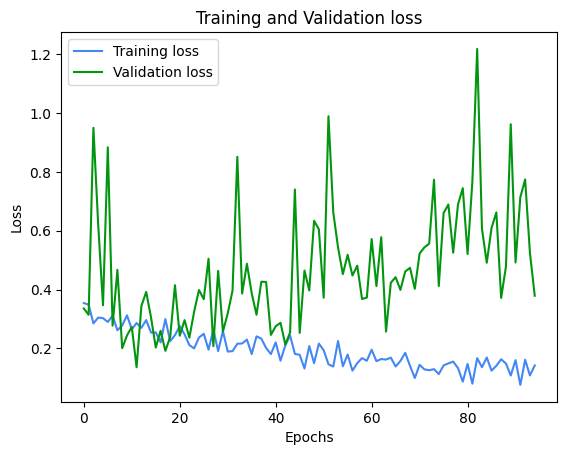

In [95]:
plt.plot(history_df.loc[:, ['loss']], "#4287f5", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#029610", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

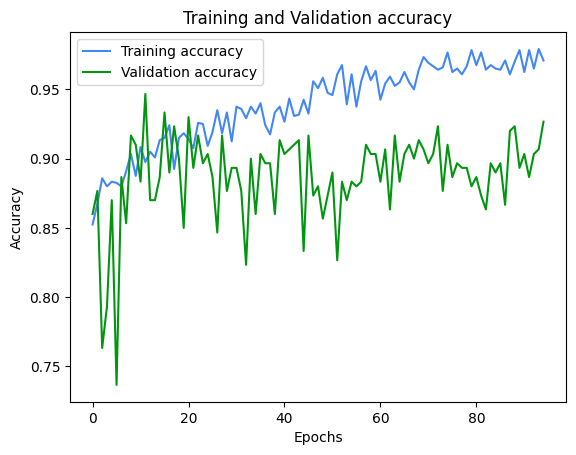

In [94]:
plt.plot(history_df.loc[:, ['accuracy']], "#4287f5", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], "#029610", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Dropout only before the last output layer increase the accuracy rather than implementing in each layer

In [84]:
test_df.drop('id', axis=1, inplace = True)

In [85]:
X_test_values = SC.fit_transform(test_df.values)
X_test_values

array([[-0.47545131,  0.968496  ,  0.31260069, ..., -1.76021608,
         1.        , -1.01409939],
       [-0.94278218,  0.968496  , -1.25583195, ...,  0.56811207,
        -1.        , -1.01409939],
       [ 1.29207729,  0.968496  ,  1.51908734, ..., -1.76021608,
         1.        ,  0.98609664],
       ...,
       [-0.1469316 , -1.03252879, -0.16999397, ...,  0.56811207,
        -1.        , -1.01409939],
       [ 0.65817305,  0.968496  , -1.25583195, ..., -1.76021608,
         1.        , -1.01409939],
       [ 0.04971753,  0.968496  , -1.25583195, ...,  0.56811207,
        -1.        ,  0.98609664]])

In [86]:
test_df.iloc[10:11].values

array([[1.500e+03, 0.000e+00, 2.200e+00, 0.000e+00, 2.000e+00, 0.000e+00,
        5.500e+01, 6.000e-01, 8.000e+01, 7.000e+00, 6.000e+00, 5.030e+02,
        1.336e+03, 3.866e+03, 1.300e+01, 7.000e+00, 2.000e+01, 0.000e+00,
        1.000e+00, 0.000e+00]])

In [87]:
p =model.predict(SC.fit_transform(test_df[:10].values))
p

1/1 [==============================] - 0s 39ms/step


array([[7.3469225e-13, 5.0768286e-02, 9.4923168e-01, 5.4306603e-12],
       [7.7177589e-18, 1.8447166e-07, 9.9999976e-01, 1.1837561e-09],
       [4.8919289e-17, 1.5808071e-06, 9.9999845e-01, 6.6866984e-11],
       [3.0868110e-22, 1.5061995e-12, 1.7767201e-06, 9.9999821e-01],
       [9.8838800e-01, 1.1611987e-02, 3.6673693e-09, 3.3534641e-19],
       [4.8280233e-18, 7.2985593e-08, 9.9999869e-01, 1.1530248e-06],
       [2.6480771e-22, 1.3409840e-12, 1.5939866e-06, 9.9999845e-01],
       [9.9951565e-01, 4.8431533e-04, 2.3958452e-10, 2.3430939e-20],
       [4.0320747e-17, 1.2393875e-06, 9.9999881e-01, 7.4147286e-11],
       [1.0000000e+00, 2.1556881e-08, 5.3474054e-14, 7.4598269e-24]],
      dtype=float32)

In [88]:
for i in p:
  print(i.argmax())

2
2
2
3
0
2
3
0
2
0
